### PCA(주성분분석)

데이터의 분산을 최대화하는 방향을 찾는 것이 목표

In [1]:
import wget

In [2]:
wget.download('https://bit.ly/fruits_300_data', 'fruits_300.npy') # 데이터 다운받기 (fruits_300 사진데이터)

'fruits_300 (1).npy'

In [3]:
import numpy as np

In [4]:
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 10000) # pca를 돌릴수 있게 2d로 변경 -> 10000인 이유는 fruits는 100*100로 이뤄진 이미지이기 때문
fruits_2d.shape

(300, 10000)

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 50)  # 50차원으로 차원축소 진행예정
fruits_pca = pca.fit_transform(fruits_2d)
fruits_pca.shape

(300, 50)

fit_transform으로 fruits_2d의 데이터를 50개의 feature로 차원축소 할 수 있다.

In [6]:
print(np.sum(pca.explained_variance_ratio_)) # 50개의 feature가 원본데이터의 분산을 얼마나 잘 나타내고 있는지 확인

0.9214917191628865


feature 50개로 92%가 넘는 분산을 유지하고 있다.

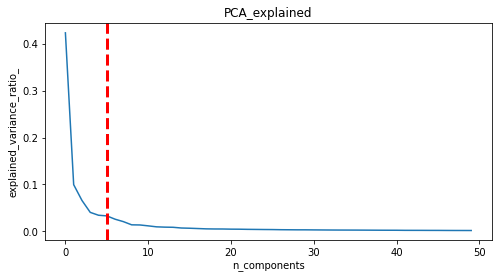

In [11]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize = (8, 4))

plt.plot(pca.explained_variance_ratio_)
plt.xlabel('n_components') # x축의 이름추가
plt.ylabel('explained_variance_ratio_') # y축의 이름추가

plt.axvline(x = 5, color = 'r', linestyle = '--', linewidth = 3) # 수직선 추가
plt.title('PCA_explained')

plt.show()

n_components가 5정도 되면 거의 모든 분산을 표현하고 있다. 즉 feature가 5개 정도만 되어도 괜찮다는 소리다. 아니면 10개라던지..

X축은 주성분의 개수, Y축은 고유값이다.
그럼, 차원축소를 하는 이유는 뭘까?

- 시각화 : 3차원 이상으로 넘어가면 우리의 눈으로 볼 수 없는 영역이다. 그래서 2차원 또는 3차원으로 차원을 축소해서 시각화를 하는 것이 좋다.

- 메모리 절약 : feature가 1000개 혹은 10000개 이상이면 데이터의 양이 엄청 늘어난다. 차원축소를 하면 Feature의 개수를 줄일 수 있으므로 메모리가 절약되고 수행속도 역시 빨라진다.

- 성능향상 : 무조건 향상되는 것은 아니나 Feature 수가 많아지면 과적합이 일어나기 쉬워 이 차원축소를 통해 과적합 확률이 적어지므로 성능향상에 도움이 될 수 있다.

In [12]:
# 얘는 시각화하려고 함수를 만들었다는데 제가 만든게 아니라서 ㅎㅎ..

def draw_fruits(arr, ratio = 1):
  n = len(arr)
  rows = int(np.ceil(n/10))
  cols = n if rows <2 else 10
  fig, axs = plt.subplots(rows, cols, figsize = (cols*ratio, rows*ratio), squeeze = False)

  for i in range(rows):
    for j in range(cols):
      if i*10 + j < n:
        axs[i,j].imshow(arr[i*10 + j], cmap = 'gray_r')
      axs[i,j].axis('off')
  plt.show()

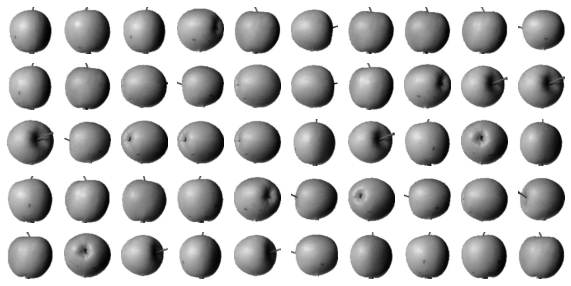

In [13]:
draw_fruits(fruits_2d[:50].reshape(-1, 100, 100)) # 원본데이터를 시각화함

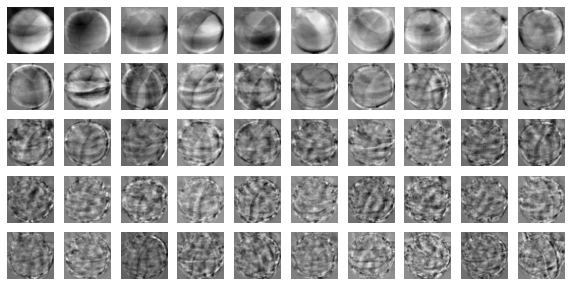

In [14]:
draw_fruits(pca.components_.reshape(-1, 100, 100)) # pca된 데이터를 시각화함